### Programming for Data Analysis Project 2

### Wisconsin Breast Cancer Dataset Analysis

In [1]:
# about data, overview and background
# import data with pandas
# preprocessing, cleaning

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from sklearn import svm

### 1. Introduction

Breast cancer is one of the most common types of cancer among women. It can be described as changing and abnormal growth of breast cells while grouping of these cells leads to tumour formation. [[1]](https://www.cancer.ie/cancer-information-and-support/cancer-types/breast-cancer) Breast cancer research by Wolberg, Street and Mangasarian from University of Wisconsin conducted in 1990s by analysing characteristics of cell nuclei in a digitized image of a fine needle aspirate of a breast mass is often used in machine learning and data analytics. [[2]](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) Diagnostic dataset was taken with the description of attributes that were measured in order to predict between two types of tumours, benign or malignant. Various classification machine learning algorithms were performed over the years on these data with different level of accuracy: Decision trees, Naïve Bayes, Support Vector Machine, Logistic regression and k-Nearest Neighbors.

### 2. Exploring Data

If we take a look at the attributes description from UCI Machine Learning Repository for our dataset, there are 569 instances with 32 attributes: Id number, Diagnosis (M for malignant and B for benign) and ten characteristics for every individual cell nucleus: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry and fractal dimension.

To check the dataset we are going to import it using pandas library.

In [3]:
cancer = pd.read_csv('data_breast_cancer.csv')

To diplay the first couple of rows we used the head function.

In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There are 33 columns in our dataset with parameters that describe the image of the nuclei. To check the total number of rows and columns we used the shape method.

In [5]:
cancer.shape

(569, 33)

To see data types, columns and null values we used info() method.

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

All of our attributes appear to have float data type except id which is integer and diagnosis that is an object.

**The names of the columns**

In [7]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

After we checked the columns names it is easier to understand why do we have 33 of them even if there is only ten attributes described besides 'id' and 'diagnosis'. The attributes repeat after the 'fractal_dimension_mean' but with different name ending, for example 'radius_se' and 'radius_worst'. That is because the first ten measured attributes refer to their mean, another ten to their standard error (with the _se ending) and the last ten represent the mean of the three largest values, for example 'radius_worst'. [[3]](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) 

**NaN Values**

By taking a closer look at data we see that the last column 'Unnamed:32' displays NaN values. Like it was shown with info method all of the values of column Unnamed:32 are NaN values. We decided to drop this column from the dataset. 

In [8]:
cancer = cancer.drop(cancer.columns[32], axis=1)

In [9]:
cancer.shape

(569, 32)

In [10]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Next, we counted how many diagnosis appear to be malignant and how many benign. 

In [11]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

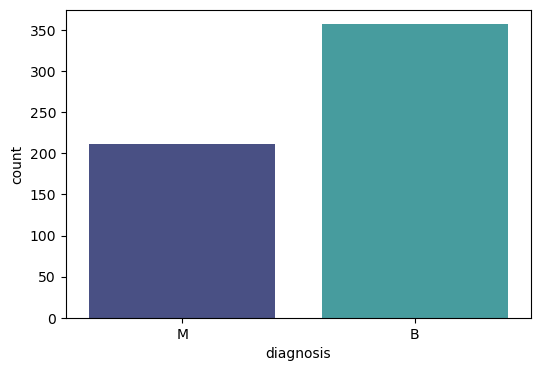

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=cancer['diagnosis'], palette='mako');

### 3. Statistics

Since we are not going to need the id column, we dropped it from the dataset. 

In [13]:
cancer = cancer.drop(cancer.columns[0], axis=1)

In [14]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


To get the descriptive statistics on data we ran the describe() method. 

In [15]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


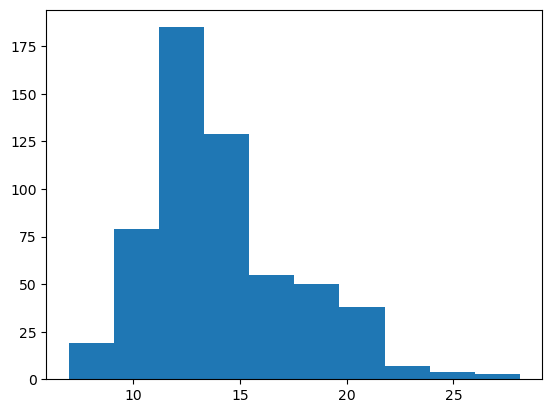

In [16]:
radius_mean1 = cancer['radius_mean']
plt.hist(radius_mean1);

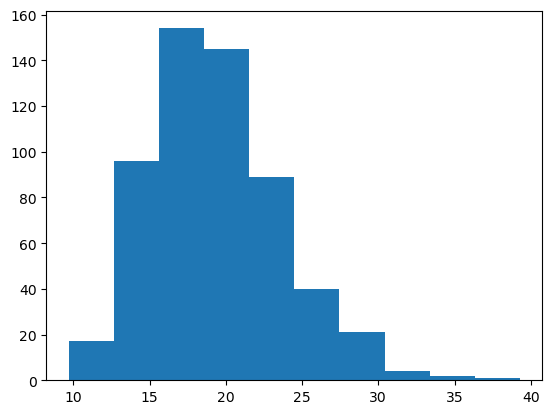

In [17]:
plt.hist(cancer['texture_mean']);

### 3.1. Correlation

Correlation for all the attributes:

In [18]:
cancer.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### 3.2. Scatterplots

To preview the correlation between variables we used scatterplots. Since there are many variables, we did it only for five of them. Diagnosis was set as a hue, dark points represent malignant cells and light points represent benign cells.

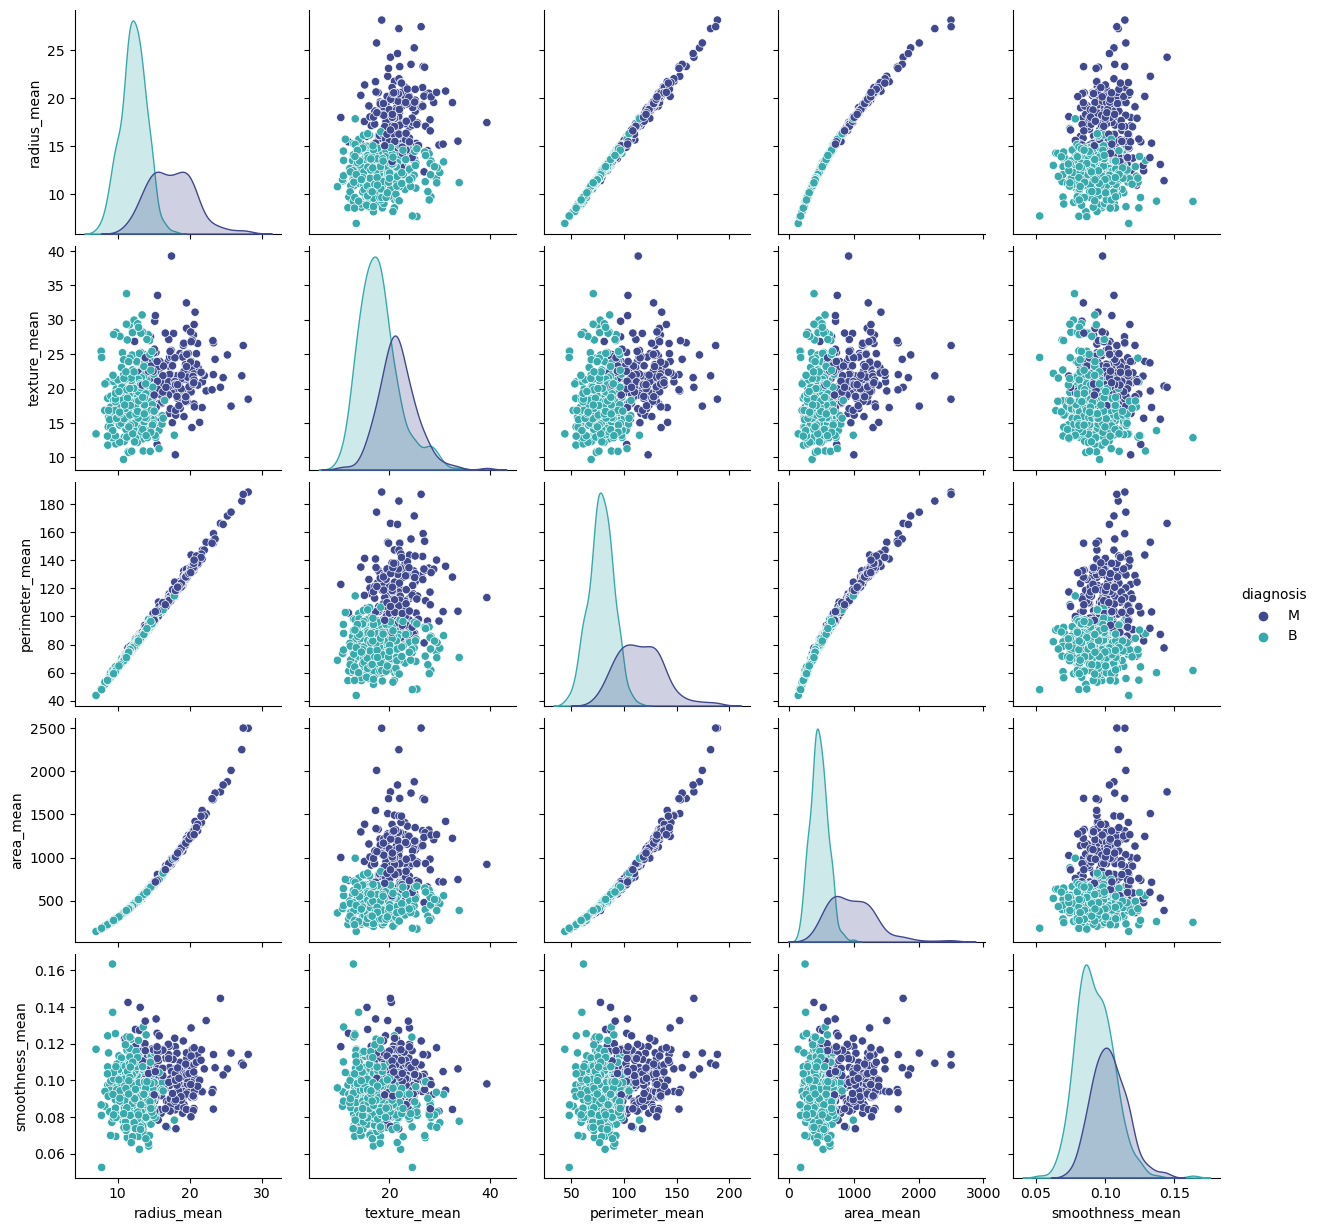

In [19]:
sns.pairplot(cancer, hue='diagnosis', palette='mako', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']);

###  4. Machine learning algorithms

**scikit-learn**

Classification which category an object belongs to; supervised algorithms - they have gold standard data, we know what is correct

Normalize data?

training set and test set

https://scikit-learn.org/stable/modules/neighbors.html

### 4.1. k-nearest-neighbors

Inputs and Outputs

In [115]:
inputs = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
outputs = cancer['diagnosis']
outputs

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [116]:
# how to create the classifier
# class within Python neighbors package
# knn object which is an instance of the class KNeighborsClassifier
# initializing, instanciating the classifier
# builds the memory of all the data it saw
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [117]:
# fitting the data, training the classifier, inputs and outputs
# gives the classifier
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [118]:
# prediction, predicting where the new data go, voting
cancer.loc[0]

diagnosis                         M
radius_mean                   17.99
texture_mean                  10.38
perimeter_mean                122.8
area_mean                    1001.0
smoothness_mean              0.1184
compactness_mean             0.2776
concavity_mean               0.3001
concave points_mean          0.1471
symmetry_mean                0.2419
fractal_dimension_mean      0.07871
radius_se                     1.095
texture_se                   0.9053
perimeter_se                  8.589
area_se                       153.4
smoothness_se              0.006399
compactness_se              0.04904
concavity_se                0.05373
concave points_se           0.01587
symmetry_se                 0.03003
fractal_dimension_se       0.006193
radius_worst                  25.38
texture_worst                 17.33
perimeter_worst               184.6
area_worst                   2019.0
smoothness_worst             0.1622
compactness_worst            0.6656
concavity_worst             

In [119]:
# Evaluate the classifier, how well it is doing
# Compare inputs to the outputs
# How many are True, how well we predicted
(knn.predict(inputs) == outputs).sum()

539

In [120]:
mod.train_test_split(inputs, outputs, test_size=0.33)

[     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 253        17.30         17.08          113.00      928.2          0.10080   
 283        16.24         18.77          108.80      805.1          0.10660   
 342        11.06         14.96           71.49      373.9          0.10330   
 178        13.01         22.22           82.01      526.4          0.06251   
 485        12.45         16.41           82.85      476.7          0.09514   
 ..           ...           ...             ...        ...              ...   
 37         13.03         18.42           82.61      523.8          0.08983   
 138        14.95         17.57           96.85      678.1          0.11670   
 343        19.68         21.68          129.90     1194.0          0.09797   
 80         11.45         20.97           73.81      401.5          0.11020   
 161        19.19         15.94          126.30     1157.0          0.08694   
 
      compactness_mean  concavity_mean  concave po

In [121]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [122]:
inputs_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
194,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
31,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,0.07799,...,16.820,28.12,119.40,888.7,0.1637,0.57750,0.69560,0.15460,0.4761,0.14020
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,14.060,24.34,92.82,607.3,0.1276,0.25060,0.20280,0.10530,0.3035,0.07661
268,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,...,13.900,23.64,89.27,597.5,0.1256,0.18080,0.19920,0.05780,0.3604,0.07062
116,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,9.414,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,14.670,16.93,94.17,661.1,0.1170,0.10720,0.03732,0.05802,0.2823,0.06794
44,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.06177,...,16.230,29.89,105.50,740.7,0.1503,0.39040,0.37280,0.16070,0.3693,0.09618
56,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,26.140,28.14,170.10,2145.0,0.1624,0.35110,0.38790,0.20910,0.3537,0.08294
311,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,...,16.460,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695


In [123]:
outputs_train

194    M
31     M
497    B
268    B
116    B
      ..
295    B
44     M
56     M
311    B
249    B
Name: diagnosis, Length: 381, dtype: object

In [124]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [125]:
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [126]:
knn.predict(inputs_test)

array(['B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M

In [127]:
knn.predict(inputs_test)==outputs_test

554     True
288     True
209    False
567     True
281     True
       ...  
308     True
172     True
135    False
169     True
12      True
Name: diagnosis, Length: 188, dtype: bool

In [128]:
(knn.predict(inputs_test)==outputs_test).sum()

178

In [34]:
#kfold validation - more probabilistic representation, the mean performance of the algorithm, repeat the algorithm

With the first k-nearest neighbors algorithm we got 93.6% of accuracy. More repeats should be done and find the mean of all the results with validation tool.

### 4.2. Support vector machines (SVMs)

https://scikit-learn.org/stable/modules/svm.html 

In [176]:
# good for high dimensional spaces, memory efficient (support vectors), kernel functions
# disadvantage - don't provide probability estimates, have to use five-fold crossvalidation
# SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.
# different types of kernels used

In [177]:
#from sklearn import svm
#X = [[0, 0], [1, 1]]
#y = [0, 1]
#clf = svm.SVC()
#clf.fit(X, y)
#SVC()

In [178]:
x = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = cancer['diagnosis']

In [179]:
# Create the classifier
# knn = nei.KNeighborsClassifier(n_neighbors=5)
clf = svm.SVC()

In [180]:
# Train the classifier
# knn.fit(inputs, outputs)
clf.fit(x, y)

SVC()

In [181]:
# predict new values
# knn.predict(inputs_test)
# clf.predict([[2., 2.]])
# array([1])

In [182]:
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.33)
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
416,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,0.2025,0.06601,...,10.85,31.24,68.73,359.4,0.1526,0.11930,0.06141,0.03770,0.2872,0.08304
422,11.610,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,0.06320,...,12.64,19.67,81.93,475.7,0.1415,0.21700,0.23020,0.11050,0.2787,0.07427
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
161,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.1124,0.20160,0.22640,0.17770,0.2443,0.06251
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.1482,0.43650,1.25200,0.17500,0.4228,0.11750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,...,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
495,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.1216,0.13880,0.17000,0.10170,0.2369,0.06599
365,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.1327,0.23760,0.27020,0.17650,0.2609,0.06735
245,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,...,11.48,29.46,73.68,402.8,0.1515,0.10260,0.11810,0.06736,0.2883,0.07748


In [183]:
y_train

416    B
422    B
0      M
161    M
68     B
      ..
50     B
495    B
365    M
245    B
167    M
Name: diagnosis, Length: 381, dtype: object

In [184]:
#knn.predict(inputs_test)
#knn.predict(inputs_test)==outputs_test
#(knn.predict(inputs_test)==outputs_test).sum()

In [185]:
clf.predict(x_test)

array(['M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B

In [186]:
clf.predict(x_test)==y_test

343     True
351     True
258     True
12      True
276     True
       ...  
96      True
58      True
412     True
3      False
303     True
Name: diagnosis, Length: 188, dtype: bool

In [187]:
(clf.predict(x_test)==y_test).sum()

176

### References:


 * McGinley, B.(2022). Lectures; Project II, Programming for Data Analysis, Atlantic Technological University
 
 
 [1] Irish Cancer Society. (n.d.). Breast Cancer. What is breast cancer? Retrieved January 8, 2023 from https://www.cancer.ie/cancer-information-and-support/cancer-types/breast-cancer    
 [2] Wolberg, W.H, Street, W.N., Mangasarian, O.L. (1995). Breast Cancer Wisconsin (Diagnostic) Data Set. UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science. Retrieved December 20, 2022 from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29  
 [3] UCI Machine Learning. (n.d.). Breast Cancer Wisconsin (Diagnostic) Data Set. Kaggle. Retrieved, December 20, 2022 from https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data  
 [4] Waskom, M.L. (2021). seaborn: statistical data visualization. v012.2 Retrieved, January 9, 2023 from https://seaborn.pydata.org/index.html    
 [5] Matplotlib   


